In [10]:
from classes.Settings import Settings
from classes.Devices import Devices
from classes.Nodes import Nodes
from classes.Resistors import Resistors
from classes.VoltageSources import VoltageSources
from classes.CurrentSources import CurrentSources
from classes.VoltageSources import CurrentSensors
from classes.Inductors import Inductors
from scripts.solve import solve

In [11]:
devices = Devices([
    Nodes("gnd"),
    Nodes("a"),
    Nodes("b"),
    Nodes("c"),
    VoltageSources("vs-gnd-a", "a", "gnd", 10, 0, 60),
    CurrentSensors("c", "gnd", index=1),
    Resistors("r-a-b", "b", "c", 4),
    #Resistors("r-a-b", "b", "c", 4),
    Inductors("i-b-c", "a", "b", 0.01)
])

results = solve(devices, Settings(simulationTime=0.1))

v_waveform_a = results.get_node_voltage("a")
#v_waveform_b = results.get_voltage_source_current("current-source-1")
v_waveform_b = results.get_voltage_source_current("currentsensor-1")

print(max(v_waveform_a))
print(max(v_waveform_b))


14.142133438426288
1.5458056243441376


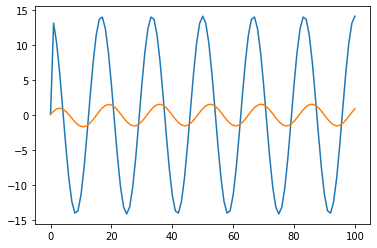

In [12]:
from matplotlib import pyplot as plt 

x = range(len(v_waveform_a))

plt.plot(x, v_waveform_a)
plt.plot(x, v_waveform_b)
plt.show()